**Importación de las librerías**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

**Cargando los datos**

In [3]:
df = pd.read_csv(r'C:\Users\yakin\OneDrive - Universidad de Guanajuato\Documentos\Universidad de Guanajuato\8vo Semestre\Análisis de Datos\Recursos\Bankrupcy_Dataset.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


**Separación de las variables X y y**

In [4]:
y = df['Bankrupt?']
X = df.drop('Bankrupt?', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [5]:
pd.DataFrame(y).value_counts()

Bankrupt?
0            6599
1             220
dtype: int64

**Usando un RandomForestClassifier para predecir la bancarrota**

In [6]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

Score:  0.9655425219941349


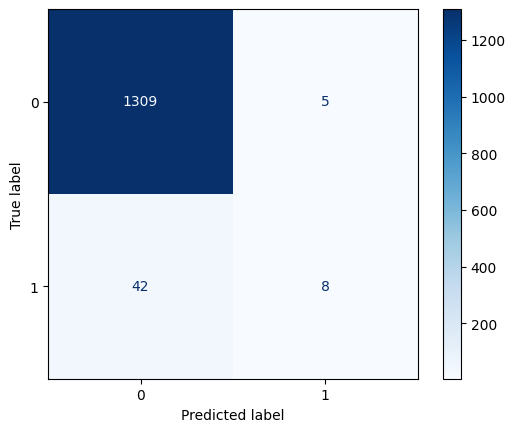

In [7]:
print('Score: ', rf_model.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

**Usando un DecisionTreeClassifier**

In [8]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

Score:  0.9457478005865103


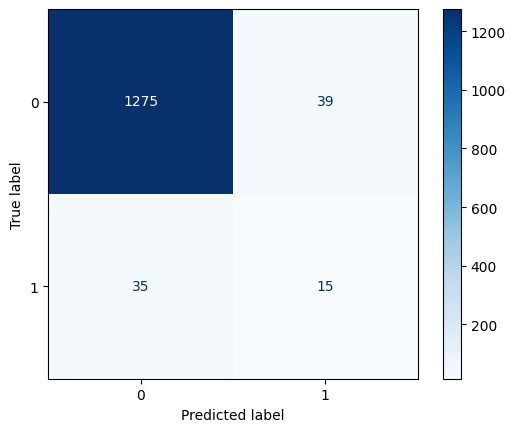

In [9]:
print('Score: ', dt_model.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

**Usando un SVC**

In [10]:
svc = SVC(kernel = 'linear') #Support Vector Classification
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
accuracy = svc.score(X_test, y_test)
print('Score: ', svc.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);